In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,Crypto,Date,Open,High,Low,Close,Adj Close,Volume
0,0,Bitcoin,2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,1,Bitcoin,2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,2,Bitcoin,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,3,Bitcoin,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,4,Bitcoin,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09


In [4]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,Crypto,Date,Open,High,Low,Close,Adj Close,Volume
0,Bitcoin,2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,Bitcoin,2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,Bitcoin,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,Bitcoin,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,Bitcoin,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Crypto     8102 non-null   object 
 1   Date       8102 non-null   object 
 2   Open       8033 non-null   float64
 3   High       8033 non-null   float64
 4   Low        8033 non-null   float64
 5   Close      8033 non-null   float64
 6   Adj Close  8033 non-null   float64
 7   Volume     8033 non-null   float64
dtypes: float64(6), object(2)
memory usage: 506.5+ KB


In [6]:
df.isnull().sum()

Crypto        0
Date          0
Open         69
High         69
Low          69
Close        69
Adj Close    69
Volume       69
dtype: int64

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df1 = df.drop(columns=['Date','Crypto'])
df_filled = imputer.fit_transform(df1)
df_filled

array([[6.56147998e+03, 6.76497998e+03, 6.46175000e+03, 6.63575000e+03,
        6.63575000e+03, 3.19711002e+09],
       [6.63475977e+03, 7.34225000e+03, 6.63475977e+03, 7.31554004e+03,
        7.31554004e+03, 4.20088013e+09],
       [7.32324023e+03, 7.96737988e+03, 7.17658008e+03, 7.87168994e+03,
        7.87168994e+03, 5.12380979e+09],
       ...,
       [2.89857635e+02, 2.90369171e+02, 2.72046112e+02, 2.82341278e+02,
        2.82341278e+02, 1.18940139e+09],
       [2.82365265e+02, 2.86084473e+02, 2.74052704e+02, 2.76579437e+02,
        2.76579437e+02, 9.56106804e+08],
       [2.76801178e+02, 2.76896881e+02, 2.68414490e+02, 2.68676697e+02,
        2.68676697e+02, 1.14972915e+09]])

In [8]:
type(df_filled)

numpy.ndarray

In [9]:
df2 = pd.DataFrame(df_filled, columns=df1.columns)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
0,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09


In [10]:
df2['Crypto']=df['Crypto']
df2['Date']=df['Date']
df2.insert(0,'Date',df2.pop('Date'))
df2.insert(0,'Crypto',df2.pop('Crypto'))
df2

,Crypto,Date,Open,High,Low,Close,Adj Close,Volume
0,Bitcoin,2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09
1,Bitcoin,2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,7315.540039,4.200880e+09
2,Bitcoin,2017-11-16,7323.240234,7967.379883,7176.580078,7871.689941,7871.689941,5.123810e+09
3,Bitcoin,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4.651670e+09
4,Bitcoin,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3.667190e+09
...,...,...,...,...,...,...,...,...
8097,BNB,2022-11-10,266.885773,311.074005,264.467743,304.080048,304.080048,2.461276e+09
8098,BNB,2022-11-11,303.986877,304.912781,280.626862,289.820557,289.820557,1.625174e+09
8099,BNB,2022-11-12,289.857635,290.369171,272.046112,282.341278,282.341278,1.189401e+09
8100,BNB,2022-11-13,282.365265,286.084473,274.052704,276.579437,276.579437,9.561068e+08


In [11]:
df=df2
df.isnull().sum()

Crypto       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Crypto     8102 non-null   object        
 1   Date       8102 non-null   datetime64[ns]
 2   Open       8102 non-null   float64       
 3   High       8102 non-null   float64       
 4   Low        8102 non-null   float64       
 5   Close      8102 non-null   float64       
 6   Adj Close  8102 non-null   float64       
 7   Volume     8102 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 506.5+ KB


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

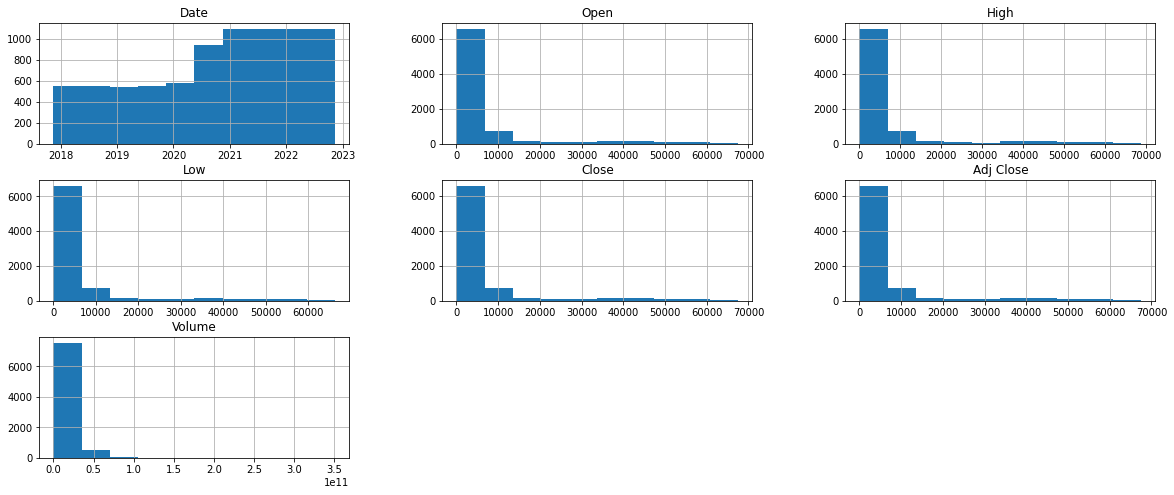

In [13]:
df.hist(figsize=(20,8))

<AxesSubplot:>

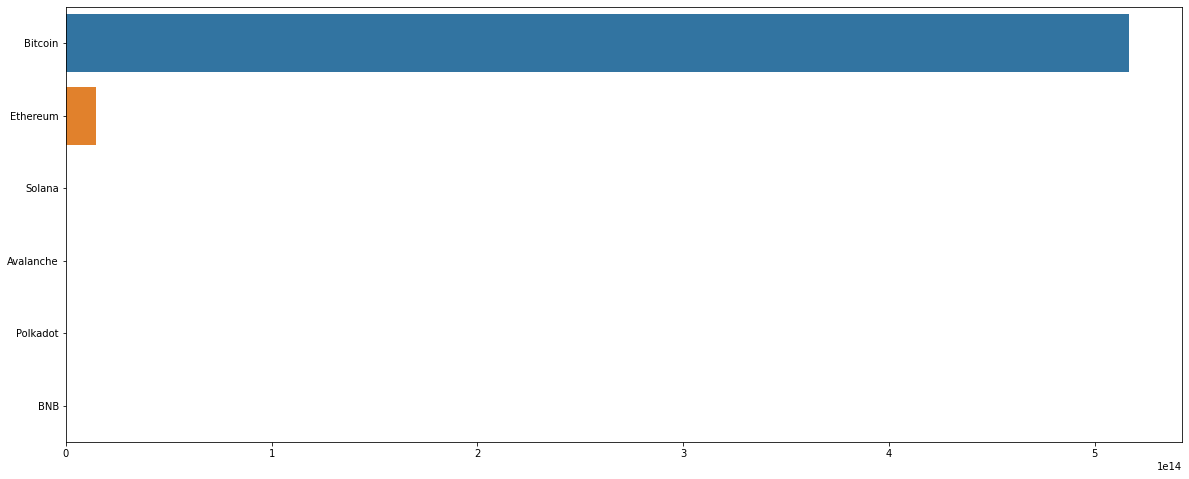

In [14]:
#Market value is the product of ciculating supply of coin and current value
name = list(df['Crypto'].unique())
marketval = []
for i in name:
    df1 = df[df['Crypto']==i]
    marketval.append(int(df1['Close'][-1:]*df1['Volume'][-1:]))
plt.subplots(figsize=(20,8))
sns.barplot(y=name,x=marketval)


In [15]:
marketval

[516485371434625,
 14637455638505,
 11678563399,
 2317441317,
 1522367908,
 308905431003]

(0.0, 11678563399.0)

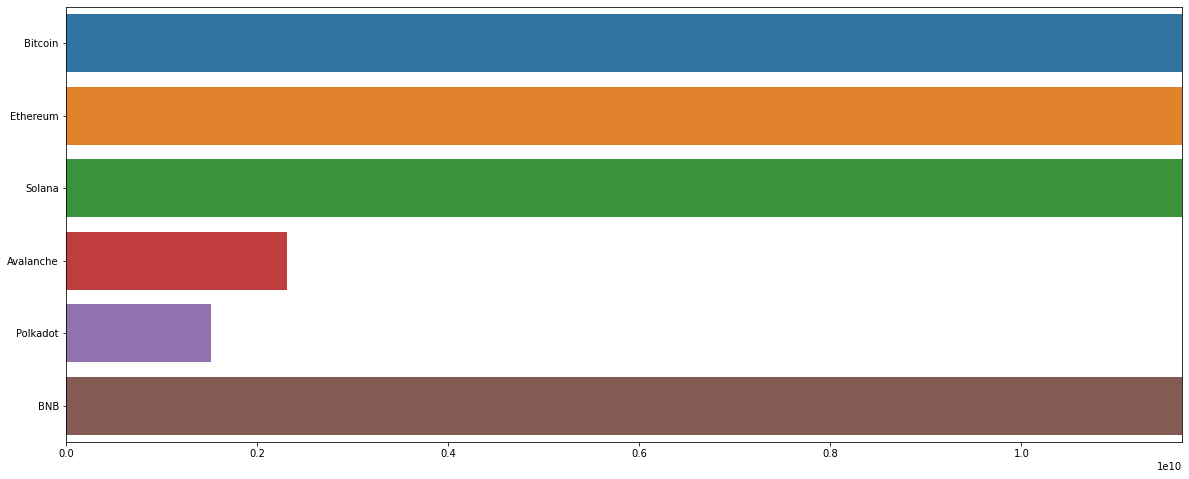

In [16]:
plt.subplots(figsize=(20,8))
sns.barplot(y=name,x=marketval)
plt.xlim(0, 11678563399)

<AxesSubplot:>

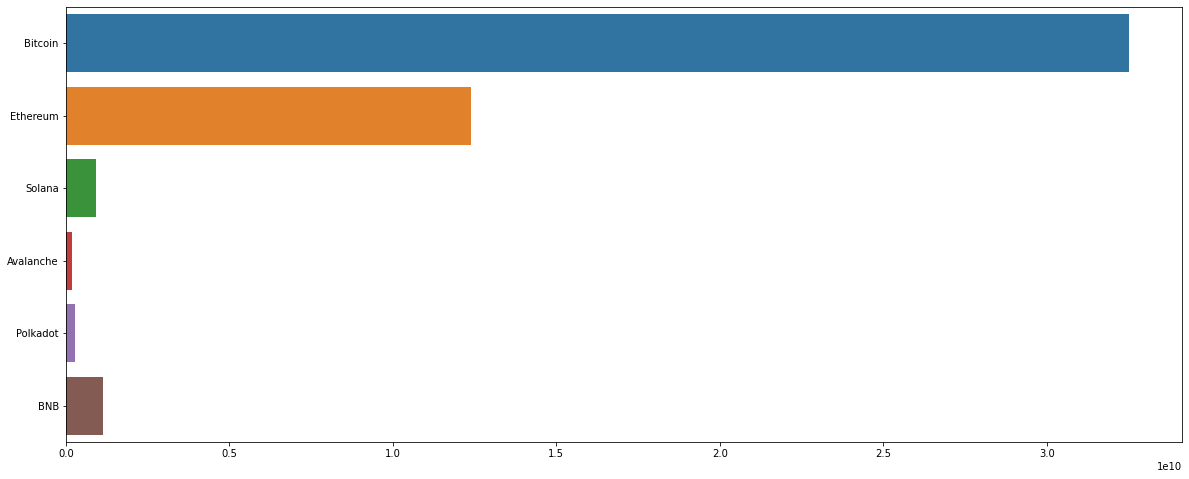

In [17]:
#volume
marketvol = []
for i in name:
    df1 = df[df['Crypto']==i]
    marketvol.append(int(df1['Volume'][-1:]))
plt.subplots(figsize=(20,8))
sns.barplot(y=name,x=marketvol)

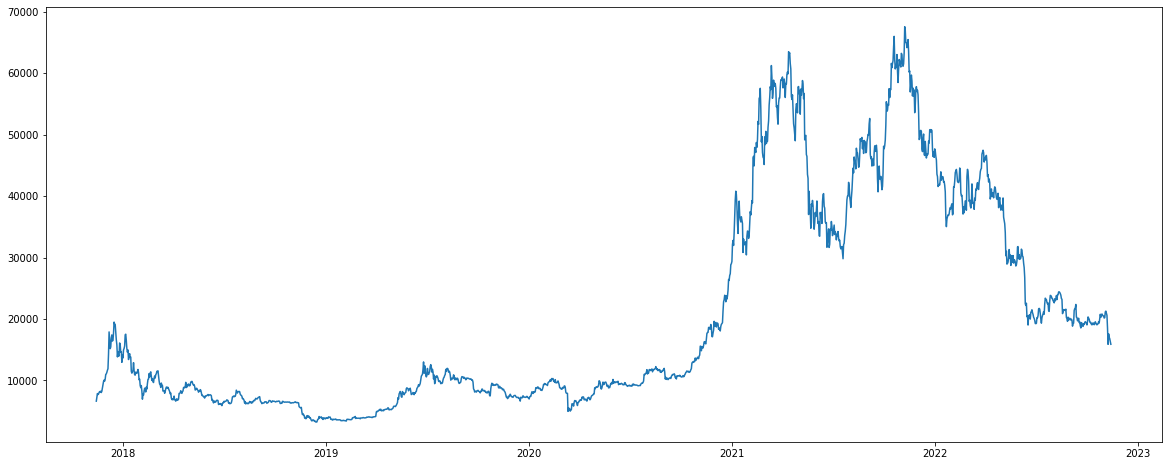

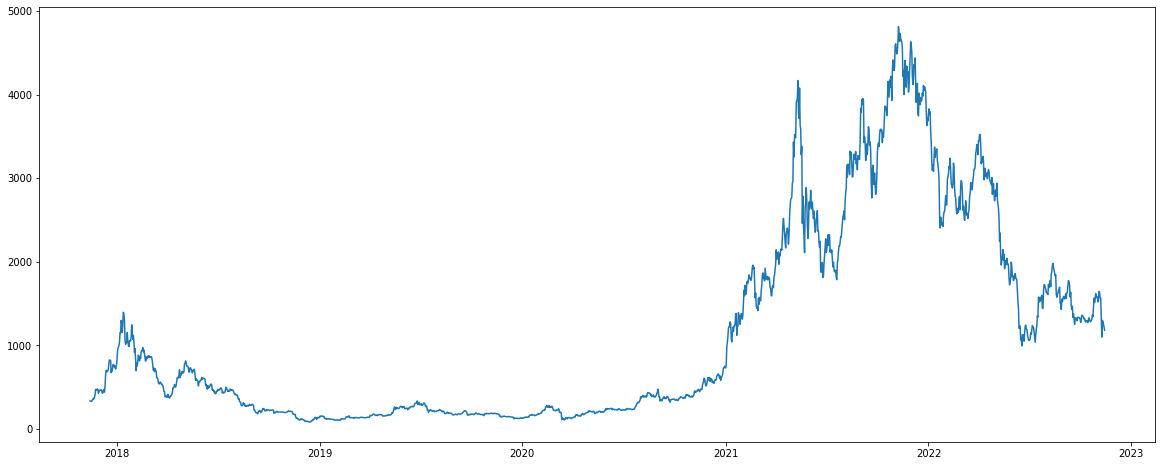

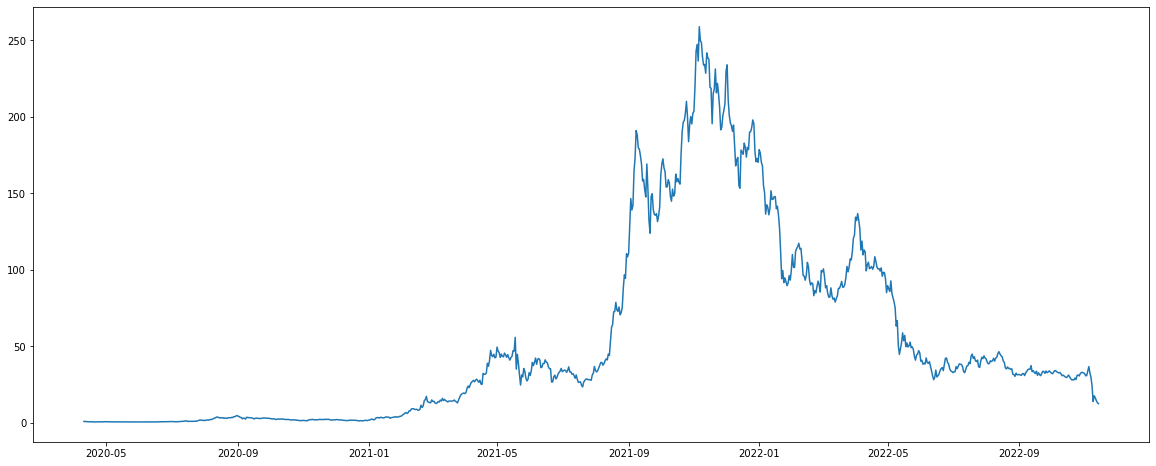

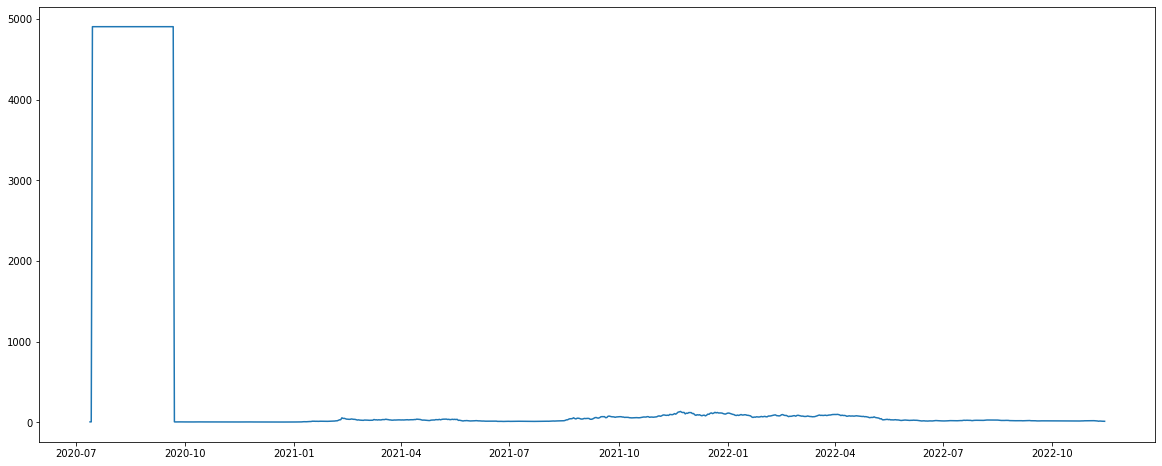

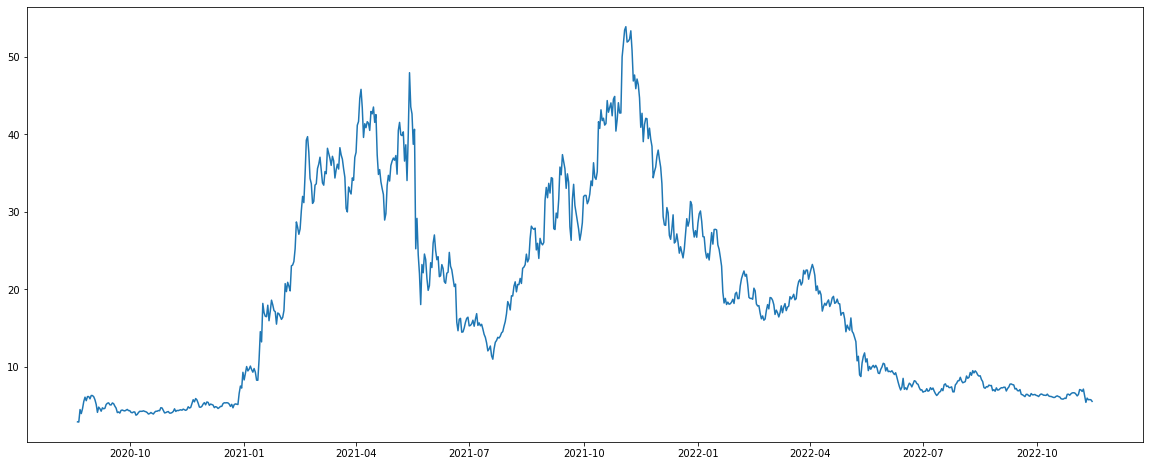

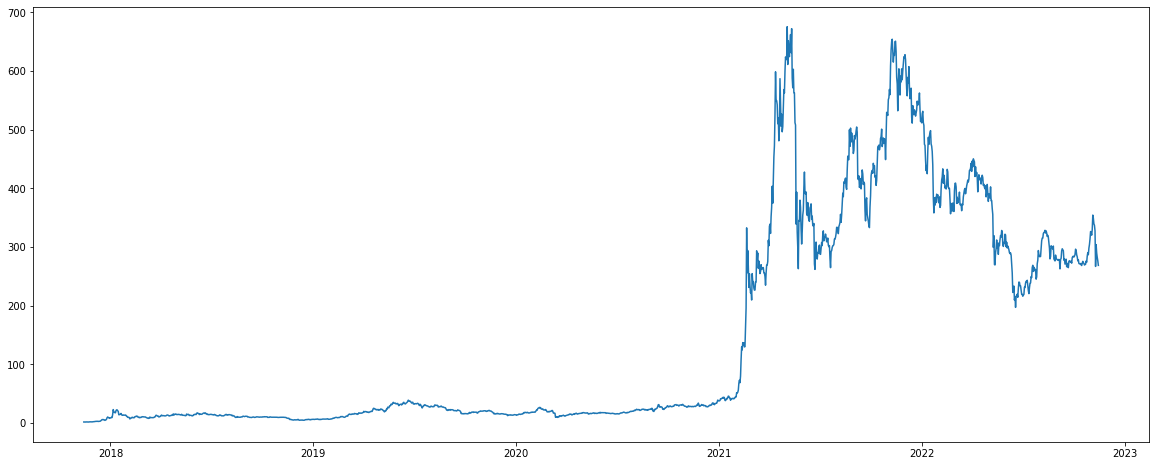

In [18]:
#closing prices
for i in name:
    plt.subplots(figsize=(20,8))
    plt.plot(df[df['Crypto']==i]['Date'],df[df['Crypto']==i]['Close'])
    plt.show()
    

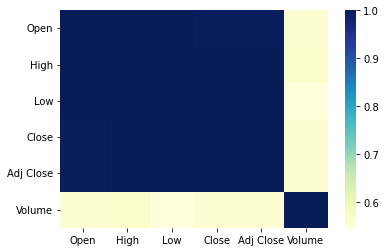

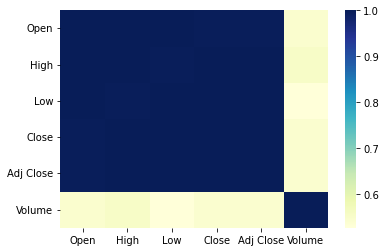

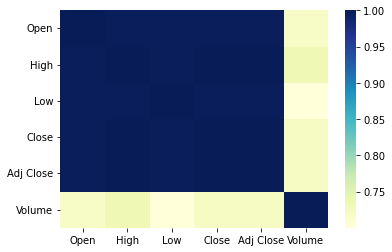

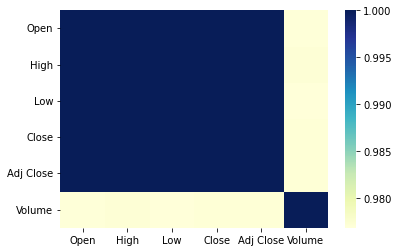

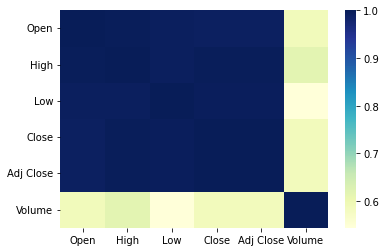

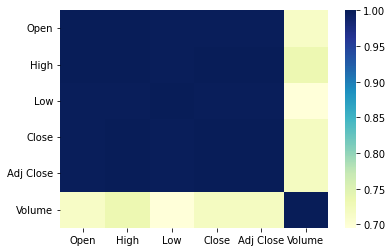

In [19]:
for i in name:
    df1 = df[df['Crypto']==i]
    sns.heatmap(df1.corr(),cmap="YlGnBu")
    plt.show()

In [20]:
df1=df[df['Crypto']=='Bitcoin']
df1=df1.drop(columns=['Crypto','Volume'])

In [21]:
X = df1.drop(columns=['Close'])
Y = df1['Close']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [23]:
X_test = X_test.drop(columns=['Date'])
X_train = X_train.drop(columns=['Date'])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1224, 4)
(1224,)
(603, 4)
(603,)


In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, Y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [25]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(Y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(np.sqrt(mean_squared_error(Y_test, predictions))))

Mean Absolute Error - MAE : 78.11599675608939
Root Mean squared Error - RMSE : 162.34877901214443


In [26]:
predictions

array([ 7424.48  ,  8034.791 , 20544.34  ,  3908.2434,  7028.0444,
        3909.0967,  4133.54  ,  9177.438 , 29047.662 , 18510.7   ,
       47537.516 , 10791.045 ,  4031.1377,  9639.463 , 11952.099 ,
        6261.268 , 19140.6   ,  8248.526 ,  8240.598 ,  9862.0205,
        4085.0815, 13650.114 ,  9890.031 ,  9294.182 ,  6609.5063,
       10329.436 , 35541.53  , 47587.582 ,  9737.579 ,  9138.848 ,
        3806.429 ,  3609.2742, 19210.732 ,  6923.788 , 47266.36  ,
       10373.623 , 11925.974 ,  3908.3293, 43173.37  ,  8721.191 ,
       61618.81  , 11789.208 , 16052.814 , 10164.832 , 17645.479 ,
       39157.04  ,  9102.551 , 35298.52  , 32266.69  , 23191.889 ,
        9091.075 , 20179.98  , 10787.873 , 40848.79  , 10127.883 ,
       32676.248 , 17109.766 , 10458.959 , 39785.777 ,  6898.1836,
       31800.648 ,  7560.982 ,  7962.2295, 32364.79  ,  8546.354 ,
       10966.029 ,  3962.1702, 21229.709 ,  3827.76  , 23821.049 ,
        9768.373 ,  8448.684 ,  3335.9321, 57106.215 , 14405.0

In [27]:
l = list(Y_test)


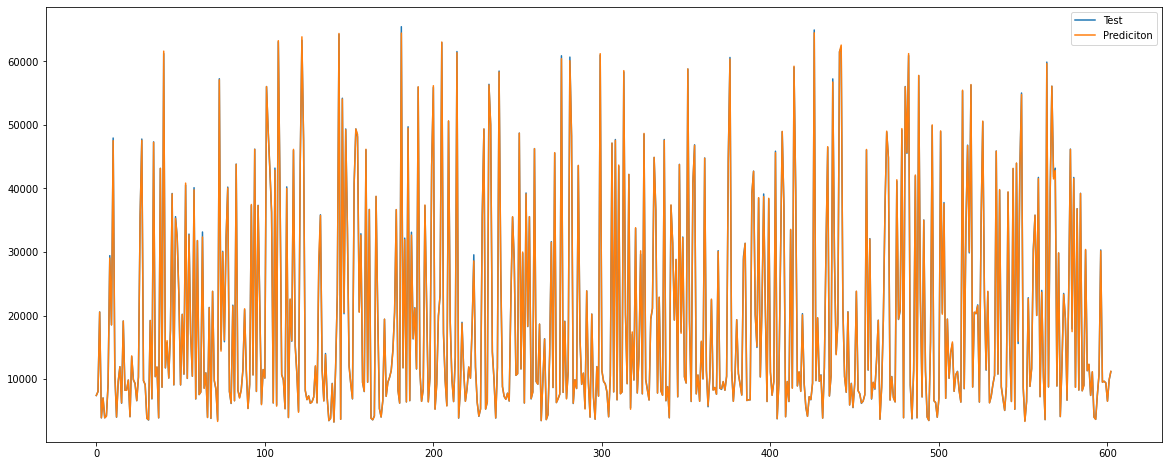

In [28]:
plt.subplots(figsize=(20,8))
plt.plot(l)
plt.plot(predictions)
plt.legend(['Test','Prediciton'])